In [42]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import PIL.ImageOps as ImageOps
from scipy import fftpack, ndimage

# import bokeh
#%matplotlib notebook

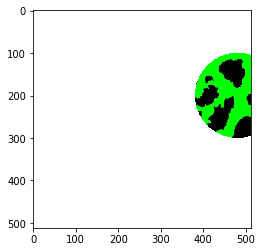

In [46]:
# img = Image.open('binary.jpg')
#img = ImageOps.invert(img)
#img = ImageOps.crop(img(x0, x1, height, width))
#img = Image.open('sample1-E10p5 artery-pseudo-binarized vessels.tif')
img = Image.open('binary.jpg')
x0, y0 = 0,0

win = 512

img = img.crop((x0, y0, x0 + win, y0 + win)) #(x0, y0, x1, y1)
#plt.imshow(img);



def circ_crop(r, x0, y0, imsize): # Returns coordinates of pixels
    ballmatrix = []
    for x in range(imsize[0]):
        for y in range(imsize[1]):
            if r >= np.sqrt((x-x0)**2+(y-y0)**2):
                ballmatrix.append([x,y])
    return ballmatrix

def circwin(im, r, x0, y0):
    pixels = im.load()
    for x in range(img.size[0]):
        for y in range(im.size[1]):
            if r < np.sqrt((x-x0)**2 + (y-y0)**2):
                pixels[x,y] = (255,255,255)
    plt.imshow(im);


x0, y0, rad = 480, 200, 100

circ = circ_crop(rad, x0, y0, img.size)
circwin(img, rad, x0, y0)


In [ ]:
 #img = Image.open('test-pattern.jpg').convert('L')
#img = img.convert('L') # Convert to monochrome
#img = img.convert('1') # Convert to black and white #FFT seems to make more sense this way



def binarize_image(img_path, threshold):
    """Binarize an image."""
    image_file = img_path
    image = image_file.convert('L')  # convert image to monochrome
    image = np.array(image)
    image = binarize_array(image, threshold)
    return image


def binarize_array(numpy_array, threshold=200):
    """Binarize a numpy array."""
    numpy_array[numpy_array > threshold] = 255
    numpy_array[numpy_array <= threshold] = 0
#     for i in range(len(numpy_array)):
#         for j in range(len(numpy_array[0])):
#             if numpy_array[i][j] > threshold:
#                 numpy_array[i][j] = 255
#             else:
#                 numpy_array[i][j] = 0
    return numpy_array

newbinary = binarize_image(img, 10)/255
plt.imshow(newbinary)
newbinary

In [41]:

#plt.imshow(img);

In [13]:
img.size


(512, 512)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


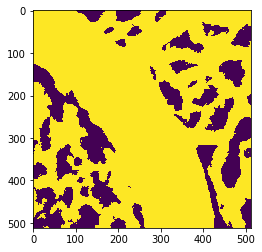

In [6]:
img_array = np.array(newbinary)
print(img_array)
plt.imshow(img_array);

In [7]:
#img_array.shape
#img_array = [[1,1,1,1],[0,0,0,0],[0,0,0,0],[0,0,0,0]]
#ax.imshowp

In [44]:
#img_fft = np.fft.fftn(img_array)
img_fft = np.fft.fft2(img_array[-120:-1,-120:-1])
print(np.abs(img_fft))

[[10063.           762.10473406   948.48102617 ...  1388.13495816
    948.48102617   762.10473406]
 [  833.42353113  1078.24239172   957.60688018 ...   801.45032962
   2113.48103315   572.5906837 ]
 [  519.7986052    150.0224593    221.95994299 ...   318.38049001
    779.92065019   660.86236945]
 ...
 [   93.23920009   290.28560123   358.39513288 ...   134.62414852
    500.52177357   153.34143838]
 [  519.7986052    660.86236945   779.92065019 ...   297.44324917
    221.95994299   150.0224593 ]
 [  833.42353113   572.5906837   2113.48103315 ...   241.78866768
    957.60688018  1078.24239172]]


In [45]:
img_fft.shape

(119, 119)

2.516233539221908
0.7776397981642094


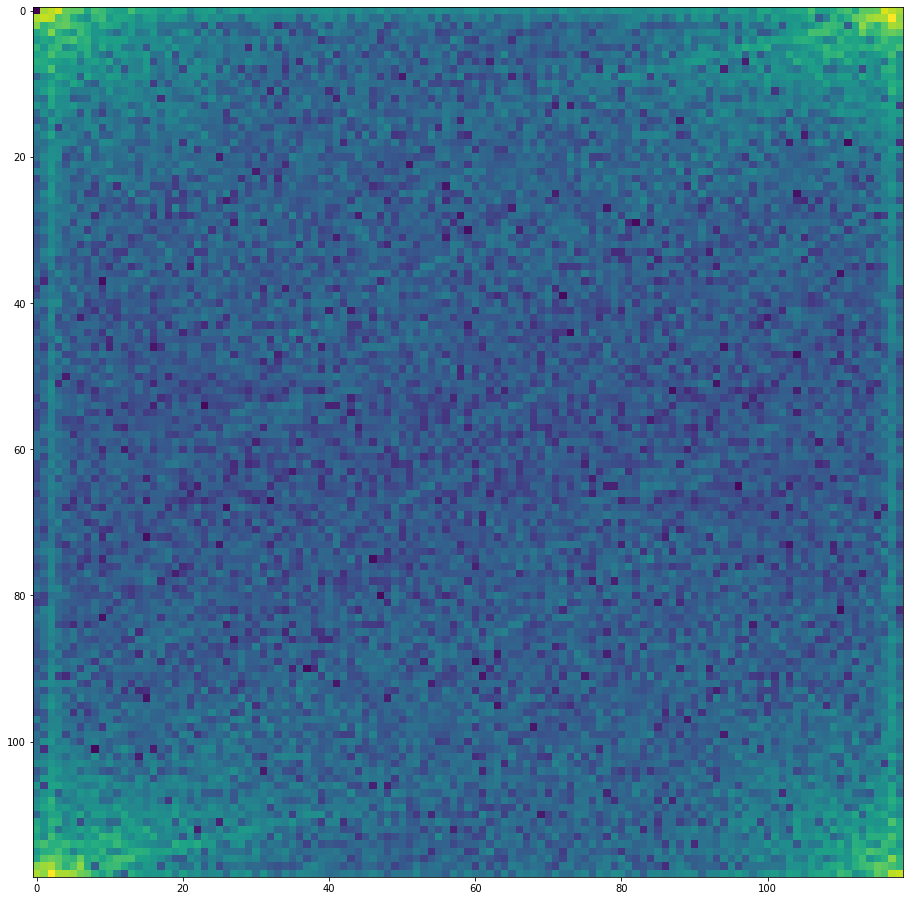

In [46]:
fig, ax = plt.subplots(1,1, figsize=(16,16))

#plt.imshow(np.log(np.abs(np.fft.fftshift(img_fft))**2));
#ax.imshow(np.abs(img_fft)/17000);
#print(np.log(np.abs(img_fft))
img_fft[0,0]=0
fftmax= np.max(np.max(np.abs(img_fft)))
fftalt = np.log(np.abs(img_fft)+1)
print(np.mean(np.mean(fftalt)))
print(np.std((fftalt)))
plt.imshow(fftalt);


In [47]:
# https://homepages.inf.ed.ac.uk/rbf/HIPR2/fourier.htm
# https://het.as.utexas.edu/HET/Software/Numpy/reference/routines.fft.html#module-numpy.fft

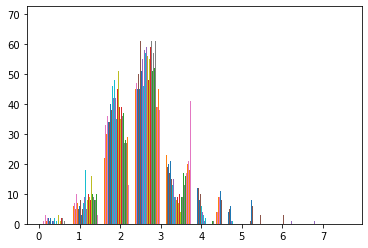

In [48]:
plt.hist(fftalt);